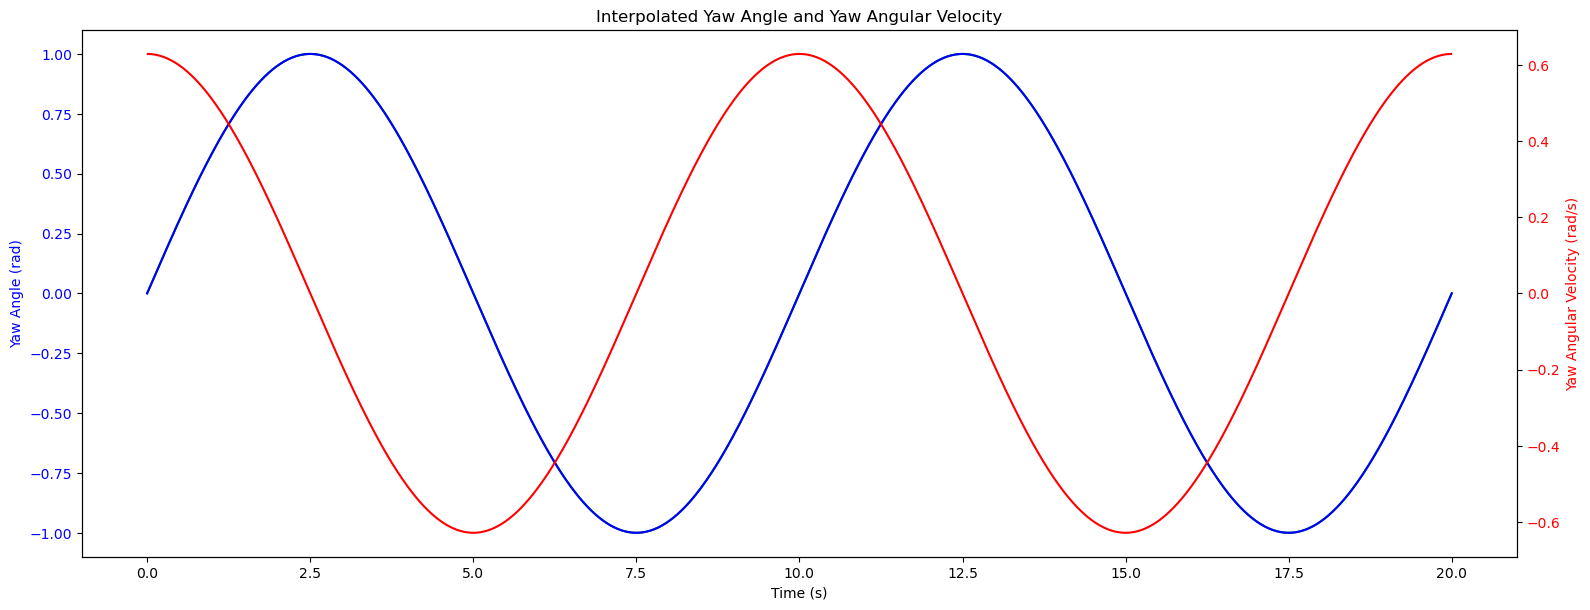

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation as R, Slerp
import matplotlib.pyplot as plt

def slerp_yaw(t, yaws, t_new, degrees=False):
    t = np.asarray(t, float)
    t_new = np.asarray(t_new, float)
    rots = R.from_euler('z', yaws, degrees=degrees)
    slerp = Slerp(t, rots)
    rots_new = slerp(t_new)
    mats_new = rots_new.as_matrix()
    angular_vel = np.zeros((len(t_new)-1, 3))
    for i in range(len(t_new)-1):
        dt = t_new[i+1] - t_new[i]
        R_delta = mats_new[i].T @ mats_new[i+1]
        rotvec_delta = R.from_matrix(R_delta).as_rotvec()
        angular_vel[i] = rotvec_delta / dt
    xyz_interp = rots_new.as_euler('xyz', degrees=degrees).squeeze()
    yaws_interp = xyz_interp[:, 2]
    yaw_vel = angular_vel[:, 2]
    return yaws_interp, yaw_vel

if __name__ == "__main__":
    t_original = np.linspace(0, 20, 1000)
    yaws_original = np.sin(2*np.pi*t_original*0.1)
    t_query = np.linspace(0, 20, 1000)
    yaws_interpolated, angular_vel, yaw_vel = slerp_yaw(t_original, yaws_original, t_query, degrees=False)
    t_vel = t_query[:-1] + np.diff(t_query)/2
    fig, ax1 = plt.subplots(1, 1, figsize=(16, 6))
    ax1.plot(t_original, yaws_original, 'g-', label='Original Yaw')
    ax1.plot(t_query, yaws_interpolated, 'b-', label='Yaw Angle')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Yaw Angle (rad)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax2 = ax1.twinx()
    ax2.plot(t_vel, yaw_vel, 'r-', label='Yaw Angular Velocity')
    ax2.set_ylabel('Yaw Angular Velocity (rad/s)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    fig.tight_layout()
    plt.title('Interpolated Yaw Angle and Yaw Angular Velocity')
    plt.show()
